                               SARIMAX Results                                
Dep. Variable:                  266.0   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -191.610
Date:                Sun, 24 Nov 2024   AIC                            395.219
Time:                        21:38:34   BIC                            404.377
Sample:                    02-01-1901   HQIC                           398.342
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9061      0.226     -4.015      0.000      -1.348      -0.464
ar.L2         -0.2389      0.248     -0.962      0.336      -0.726       0.248
ar.L3          0.1150      0.271      0.425      0.6

/tmp/ipykernel_659003/2675072287.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(
/home/rajaraman/miniconda3/envs/ml312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/rajaraman/miniconda3/envs/ml312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/rajaraman/miniconda3/envs/ml312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


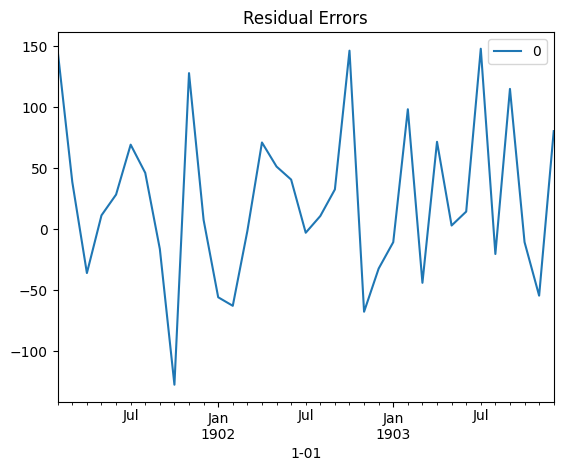

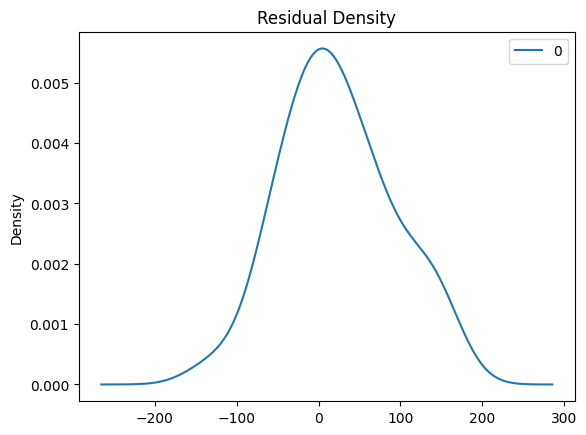

                0
count   35.000000
mean    23.199894
std     67.055482
min   -127.746544
25%    -18.432914
50%     11.215406
75%     70.106933
max    147.928105


In [11]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# Define the parser function
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# Read the dataset
series = read_csv(
    'shampoo-sales.csv',
    header=0,
    parse_dates=[0],
    index_col=0,
    date_parser=parser
)

# Uncomment the following lines to explore the data
# print(series.head())
# autocorrelation_plot(series)
# series.plot()
# plt.show()

# Fit the ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.title("Residual Errors")
plt.show()

residuals.plot(kind='kde')
plt.title("Residual Density")
plt.show()

print(residuals.describe())
